In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import statsmodels

# Problem :- Temperature Forecasting

- Data Set: Temperature data set
- Model SARIMAX

In [18]:
# Import necessary models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Loading data set

data  = pd.read_csv(r'C:\Users\Tuhin\OneDrive\Desktop\BIA PROJECT\temperature.csv')
data.head()

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400


In [20]:
#Backup Data

df = data.copy()
df.head()

,Unnamed: 0,Datetime,Hourly_Temp
0,0,04-01-2022 00:00,20.867
1,1,04-01-2022 01:00,21.000
2,2,04-01-2022 02:00,20.867
3,3,04-01-2022 03:00,20.650
4,4,04-01-2022 04:00,20.400


In [21]:
# For Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   7056 non-null   int64  
 1   Datetime     7056 non-null   object 
 2   Hourly_Temp  7056 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 165.5+ KB


In [22]:
# Checking Duplicate Value

df[df.duplicated()]

,Unnamed: 0,Datetime,Hourly_Temp


In [23]:
# Droping irrevent coloumn

df.drop(columns = 'Unnamed: 0' , axis = 1 , inplace = True)

In [24]:
#checking Null Values
df.isnull().sum()

Datetime       0
Hourly_Temp    0
dtype: int64

In [25]:
df.head()

,Datetime,Hourly_Temp
0,04-01-2022 00:00,20.867
1,04-01-2022 01:00,21.000
2,04-01-2022 02:00,20.867
3,04-01-2022 03:00,20.650
4,04-01-2022 04:00,20.400


In [26]:
#Change data type of Datetimes
df['Datetime'] = pd.to_datetime(df['Datetime'],format = '%d-%m-%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7056 entries, 0 to 7055
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Datetime     7056 non-null   datetime64[ns]
 1   Hourly_Temp  7056 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 110.4 KB


In [27]:
# set  date time as index
df.set_index(df['Datetime'] , inplace = True)
df.head()

,Datetime,Hourly_Temp
Datetime,,
2022-01-04 00:00:00,2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,2022-01-04 04:00:00,20.400


In [28]:
# set  date time as index
df.set_index('Datetime' , inplace = True)
df.head()

,Hourly_Temp
Datetime,
2022-01-04 00:00:00,20.867
2022-01-04 01:00:00,21.000
2022-01-04 02:00:00,20.867
2022-01-04 03:00:00,20.650
2022-01-04 04:00:00,20.400


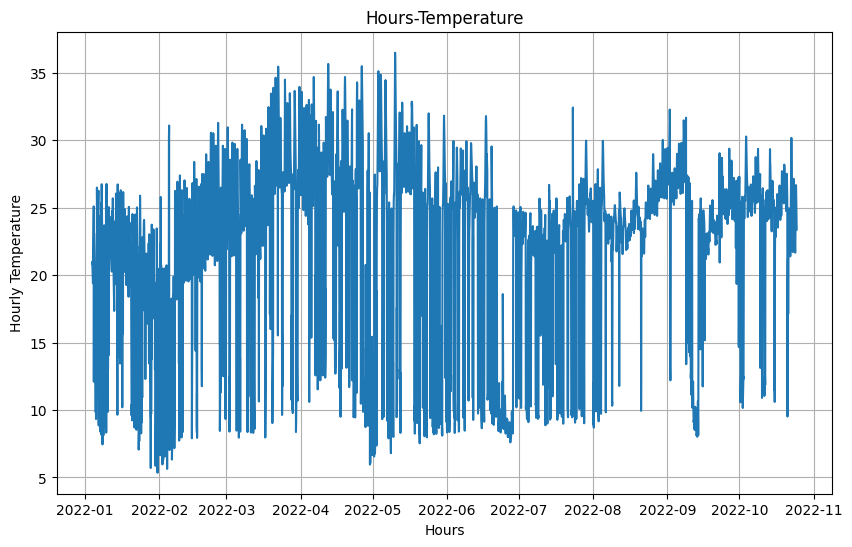

In [29]:
# Visiualization the temperature
plt.figure(figsize = (10,6))
plt.plot(df)
plt.xlabel('Hours')
plt.ylabel('Hourly Temperature')
plt.title('Hours-Temperature')
plt.grid()
plt.show()

In [30]:
# Checking stationarity
# Creating a function for adfuler test
def test_stationarity(data):
    # Dickey-Fuller Test
    dftest = adfuller(data, autolag = 'AIC')
    dftest_output = pd.Series(dftest[0:4], index = ['Test_Statistics', 'p-value', 'lages_used', 'No. of obs'])
    return dftest_output

In [31]:
# Performing adfuler Test
result  = test_stationarity(df)
print("Augmented Dickey-Fuller Test: \n")
print(result)

Augmented Dickey-Fuller Test: 

Test_Statistics   -9.396891e+00
p-value            6.338903e-16
lages_used         2.500000e+01
No. of obs         7.030000e+03
dtype: float64


In [32]:
# Differencing to make data stationary
df['temp_diff'] = df['Hourly_Temp'] - df['Hourly_Temp'].shift(1)
df.dropna(inplace = True)
df.head()

,Hourly_Temp,temp_diff
Datetime,,
2022-01-04 01:00:00,21.000,0.133
2022-01-04 02:00:00,20.867,-0.133
2022-01-04 03:00:00,20.650,-0.217
2022-01-04 04:00:00,20.400,-0.250
2022-01-04 05:00:00,20.100,-0.300


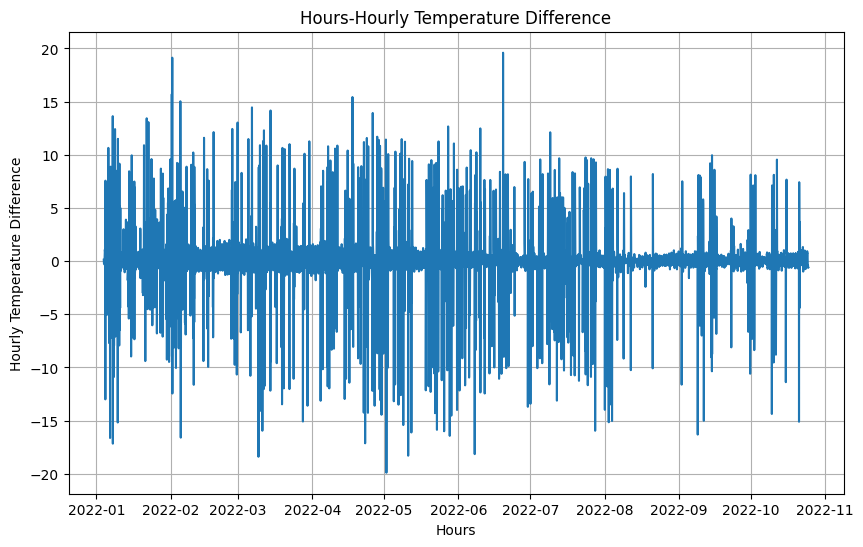

In [33]:
# Visualize the temperature difference
plt.figure(figsize = (10,6))
plt.plot(df['temp_diff'])
plt.xlabel("Hours")
plt.ylabel("Hourly Temperature Difference")
plt.title("Hours-Hourly Temperature Difference")
plt.grid()
plt.show()

In [34]:
# Checking stationarity after differencing
result = test_stationarity(df['temp_diff'])
print("Augmented Dickey-Fuller Test after differencing: \n")
print(result)

Augmented Dickey-Fuller Test after differencing: 

Test_Statistics     -20.54608
p-value               0.00000
lages_used           35.00000
No. of obs         7019.00000
dtype: float64


In [35]:
# Model Training
model = SARIMAX(df['Hourly_Temp'], order = (1,1,1), seasonal_order = (1,1,1,24))
result = model.fit(disp = False)

In [37]:
#Forecust feture values
forecast_steps = 24
forecast = result.get_forecast(steps = forecast_steps)

In [38]:
# Create a daterange for forecasting
date_range = pd.date_range(start = df.index[-1], periods = forecast_steps, freq = 'H')
date_range

DatetimeIndex(['2022-10-24 23:00:00', '2022-10-25 00:00:00',
               '2022-10-25 01:00:00', '2022-10-25 02:00:00',
               '2022-10-25 03:00:00', '2022-10-25 04:00:00',
               '2022-10-25 05:00:00', '2022-10-25 06:00:00',
               '2022-10-25 07:00:00', '2022-10-25 08:00:00',
               '2022-10-25 09:00:00', '2022-10-25 10:00:00',
               '2022-10-25 11:00:00', '2022-10-25 12:00:00',
               '2022-10-25 13:00:00', '2022-10-25 14:00:00',
               '2022-10-25 15:00:00', '2022-10-25 16:00:00',
               '2022-10-25 17:00:00', '2022-10-25 18:00:00',
               '2022-10-25 19:00:00', '2022-10-25 20:00:00',
               '2022-10-25 21:00:00', '2022-10-25 22:00:00'],
              dtype='datetime64[ns]', freq='h')

In [39]:
# Get forecasted vales and confidence interval
forecast_values = forecast.predicted_mean
forecast_con_int = forecast.conf_int()
forecast_con_int
df_prediction = pd.DataFrame({'Forecast': forecast_values, 'Lower_CI': forecast_con_int.iloc[:,0], 'Upper_CI': forecast_con_int.iloc[:,1]})
df_prediction

,Forecast,Lower_CI,Upper_CI
2022-10-25 00:00:00,23.352777,18.000931,28.704623
2022-10-25 01:00:00,23.050825,15.215406,30.886243
2022-10-25 02:00:00,21.575434,11.897757,31.253110
2022-10-25 03:00:00,21.395748,10.171795,32.619702
2022-10-25 04:00:00,21.940353,9.359003,34.521703
2022-10-25 05:00:00,22.190754,8.384800,35.996707
2022-10-25 06:00:00,22.295171,7.364723,37.225618
2022-10-25 07:00:00,22.326694,6.350707,38.302681
2022-10-25 08:00:00,22.356283,5.399099,39.313466
2022-10-25 09:00:00,22.387703,4.503073,40.272333


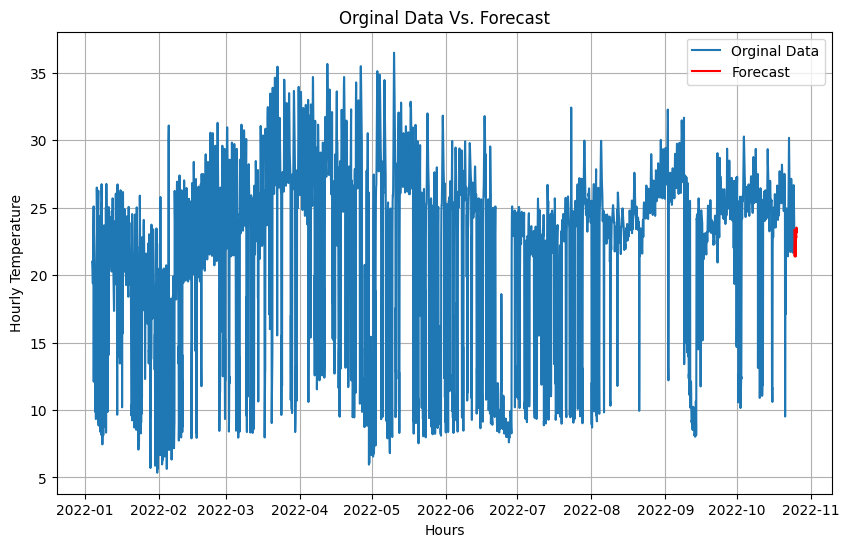

In [40]:
# Plot Orginal Data and the Forecast

plt.figure(figsize = (10,6))

plt.plot(df['Hourly_Temp'], label = 'Orginal Data')

plt.plot(df_prediction['Forecast'], label = 'Forecast', color = 'red')

plt.xlabel('Hours')

plt.ylabel('Hourly Temperature')

plt.title('Orginal Data Vs. Forecast')

plt.legend()

plt.grid()

plt.show()
 